In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose


%matplotlib inline

In [2]:
solar_cycle = pd.read_csv('data/solar_cycle_1.csv', parse_dates=True)
wheat_price = pd.read_csv('data/WheatPrices_annual.csv',parse_dates=True)
corn_price = pd.read_csv('data/CornPrices_annual.csv',parse_dates=True)
solar_cycle0 = pd.read_csv('data/solar_cycle.csv',parse_dates=True)
wheat_weather = pd.read_csv('data/Wheat_weather_daily.csv',parse_dates=True)
corn_weather = pd.read_csv('data/Corn_weather_daily.csv',parse_dates=True)
cycle_lists = pd.read_csv('data/Solar_cycle_list.csv',parse_dates=True)

flux_data =pd.read_csv('data/Flux_data_extended.csv',parse_dates=True)
flux_data.rename(columns={'time':'Date','absolute_f30':'Flux'}, inplace = True)


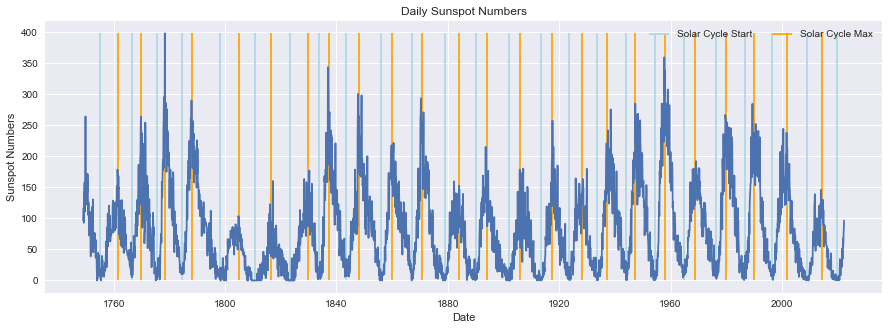

In [3]:
# Solar Cycles 
plt.style.use('seaborn')

# Format dates Correctly 
startDates = pd.to_datetime(cycle_lists[['startYear', 'startMonth']].astype(str).agg('-'.join, axis=1))
maxDates = cycle_lists[['maxYear', 'maxMonth']].copy().dropna()
maxDates.maxYear = maxDates.maxYear.astype(int).astype(str)
maxDates.maxMonth = maxDates.maxMonth.astype(int).astype(str)
maxDates = pd.to_datetime(maxDates.agg('-'.join, axis=1))

solar_cycle.index = pd.to_datetime(solar_cycle.Date)
pdf = solar_cycle[['Date', 'ssn']].copy()
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(pdf.index,pdf.ssn)
ax.vlines(startDates, ymin=0, ymax=max(pdf.ssn), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates, ymin=0, ymax=max(pdf.ssn), color = 'orange', label = 'Solar Cycle Max')
plt.legend(ncol = 2)

ax.set_ylabel('Sunspot Numbers')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Daily Sunspot Numbers')

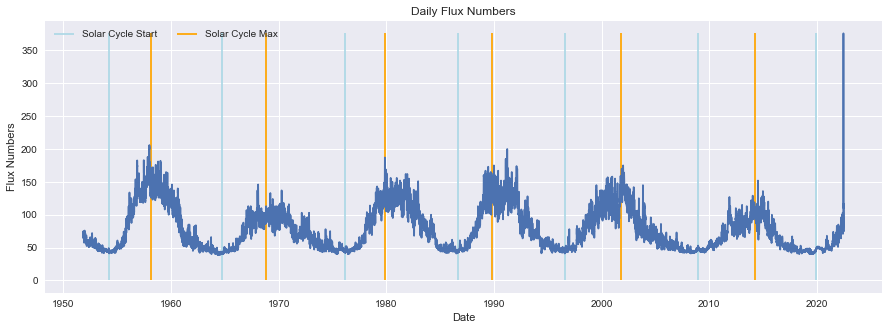

In [4]:
# Flux Values Cycles 
plt.style.use('seaborn')

flux_data.index = pd.to_datetime(flux_data.Date)
pdf = flux_data.copy()
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(pdf.index,pdf.Flux)
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=0, 
            ymax=max(pdf.Flux), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=0, ymax=max(pdf.Flux), color = 'orange', label = 'Solar Cycle Max')

plt.legend(ncol = 2)
ax.set_ylabel('Flux Numbers')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Daily Flux Numbers')

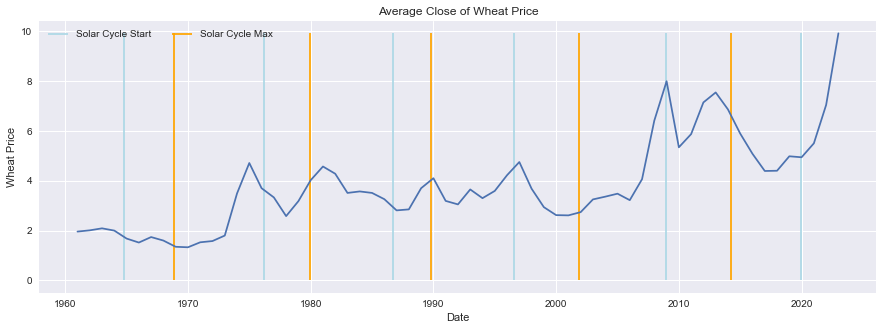

In [5]:
# Wheat Price Vs. Cycles
plt.style.use('seaborn')

wheat_price.index = [pd.to_datetime(str(x) + '-12-31') for x in wheat_price.Year]
pdf = wheat_price.copy()
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(pdf.index,pdf.AvgClose)
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=0, 
            ymax=max(pdf.AvgClose), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=0, ymax=max(pdf.AvgClose), color = 'orange', label = 'Solar Cycle Max')
plt.legend(ncol = 2)
ax.set_ylabel('Wheat Price')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Close of Wheat Price')

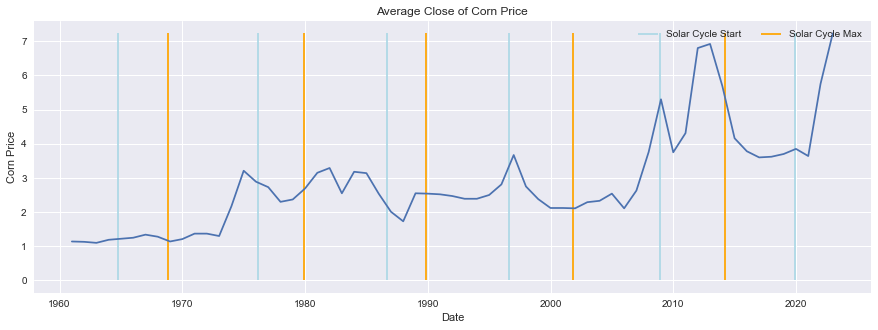

In [6]:
# Flux Values Cycles 
plt.style.use('seaborn')

corn_price.index = [pd.to_datetime(str(x) + '-12-31') for x in corn_price.Year]
pdf = corn_price.copy()
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(pdf.index,pdf.AvgClose)
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=0, 
            ymax=max(pdf.AvgClose), color = 'lightblue', label='Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=0, ymax=max(pdf.AvgClose), color = 'orange', label = 'Solar Cycle Max')
plt.legend(loc="upper right", ncol=2)

ax.set_ylabel('Corn Price')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Close of Corn Price')

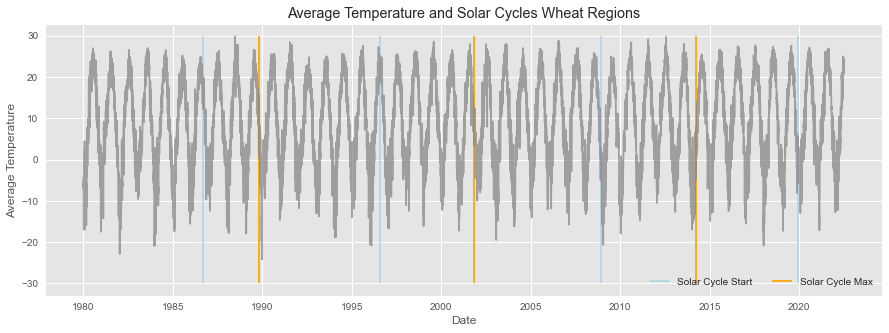

In [7]:
# Flux Values Cycles 
plt.style.use('ggplot')

wheat_weather.index = pd.to_datetime(wheat_weather.time)
pdf = wheat_weather.copy()
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(pdf.index,pdf.tavg, alpha = .7, color = 'grey')
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=-30, 
            ymax=max(pdf.tavg), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=-30, ymax=max(pdf.tavg), color = 'orange', label = 'Solar Cycle Max')

plt.legend(loc="lower right", ncol=2)


ax.set_ylabel('Average Temperature')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Temperature and Solar Cycles Wheat Regions')

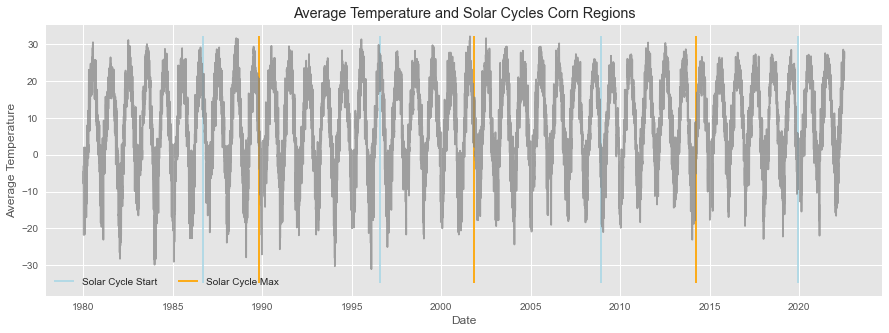

In [8]:
# Flux Values Cycles 
plt.style.use('ggplot')

corn_weather.index = pd.to_datetime(corn_weather.time)
pdf = corn_weather.copy()
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(pdf.index,pdf.tavg, alpha = .7, color = 'grey')
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=-35, 
            ymax=max(pdf.tavg), color = 'lightblue', label='Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=-35, ymax=max(pdf.tavg), color = 'orange', label = 'Solar Cycle Max')
plt.legend(loc="lower left", ncol=2)

ax.set_ylabel('Average Temperature')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Temperature and Solar Cycles Corn Regions')

In [9]:
# Annualize data
annual_solar_cyclce = solar_cycle.drop(columns = ['Date', 'Unnamed: 0']).resample('Y').agg('sum')['ssn']
annual_wheat_weather = wheat_weather.fillna(0).resample('Y').agg('mean').drop(columns = ['lat', 'lng', 'wpgt','tsun'])
wheat_df = annual_wheat_weather.merge(annual_solar_cyclce, left_index=True, right_index=True, how= 'inner')
wheat_df = wheat_df.merge(wheat_price['AvgClose'], left_index=True, right_index=True, how= 'inner')
wheat_df = wheat_df.drop(columns = ['tmin', 'tmax'])

In [10]:
annual_solar_cyclce = solar_cycle.drop(columns = ['Date', 'Unnamed: 0']).resample('Y').agg('sum')['ssn']
annual_corn_weather = corn_weather.fillna(0).resample('Y').agg('mean').drop(columns = ['lat', 'lng', 'wpgt','tsun'])
corn_df = annual_corn_weather.merge(annual_solar_cyclce, left_index=True, right_index=True, how= 'inner')
corn_df = corn_df.merge(corn_price['AvgClose'], left_index=True, right_index=True, how= 'inner')
corn_df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,ssn,AvgClose
1980-12-31,7.526503,1.940984,12.845628,1.512842,19.215847,126.808743,15.548634,1013.920765,2627.7,3.15
1981-12-31,8.135068,2.560274,13.335890,1.949589,21.276712,140.816438,16.348219,1010.856164,2385.4,3.29
1982-12-31,7.132329,1.901096,12.057260,2.104658,84.408219,129.890411,17.479726,1014.006575,1954.6,2.55
1983-12-31,7.798082,3.117260,12.170959,2.721096,81.073973,131.926027,18.118630,1013.597808,1089.5,3.18
1984-12-31,7.454098,2.416393,12.220492,2.566940,66.202186,133.081967,18.678962,1013.848634,727.9,3.14


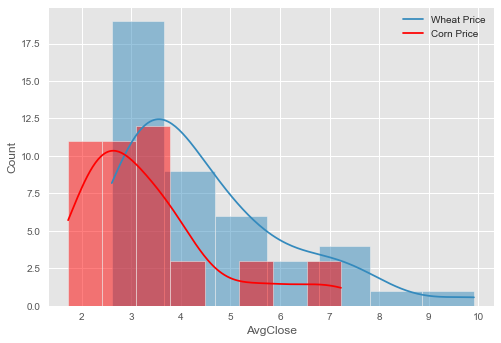

In [11]:
sns.histplot(wheat_df['AvgClose'], kde= True)
sns.histplot(corn_df['AvgClose'], kde = True, color = 'red')
plt.legend(labels=["Wheat Price","Corn Price"])

In [12]:
def ts_analysis(timeSeries, n_periods = 360, show_plots = True, title=None):
    "Return time series decomposition for dataframe. Set Show_plots = False to return data"
    assert n_periods < len(timeSeries), "Number of Periods given is greater than the data given "
    # Additive Decomposition
    additive = seasonal_decompose(timeSeries, model='additive', extrapolate_trend='freq',period=n_periods)
    # Multiplicative Decomposition 
    multiplicative = seasonal_decompose(timeSeries, model='multiplicative', extrapolate_trend='freq', period=n_periods)
    if show_plots != True:
        return additive, multiplicative
    else:
        fig, axes = plt.subplots(4,2, figsize = (15,8))
        axes[0,0].plot(additive.observed, color = 'Black')
        axes[1,0].plot(additive.trend, color = 'orange')
        axes[2,0].plot(additive.seasonal, color = 'green')
        axes[3,0].plot(additive.resid, color = 'red')
        axes[0,1].plot(multiplicative.observed, color = 'Black')
        axes[1,1].plot(multiplicative.trend, color = 'orange')
        axes[2,1].plot(multiplicative.seasonal, color = 'green')
        axes[3,1].plot(multiplicative.resid, color = 'red')

        axes[0,0].set_title("Additive")
        axes[1,0].set_title("Trend")
        axes[2,0].set_title("Seasonality")
        axes[3,0].set_title("Residuals")
        axes[0,1].set_title("Multiplicative")
        axes[1,1].set_title("Trend")
        axes[2,1].set_title("Seasonality")
        axes[3,1].set_title("Residuals")
        if title == None: 
            fig.suptitle('Time Series Decomposition')
        else: 
            fig.suptitle(title)
        fig.autofmt_xdate()
        plt.tight_layout()
        plt.show()

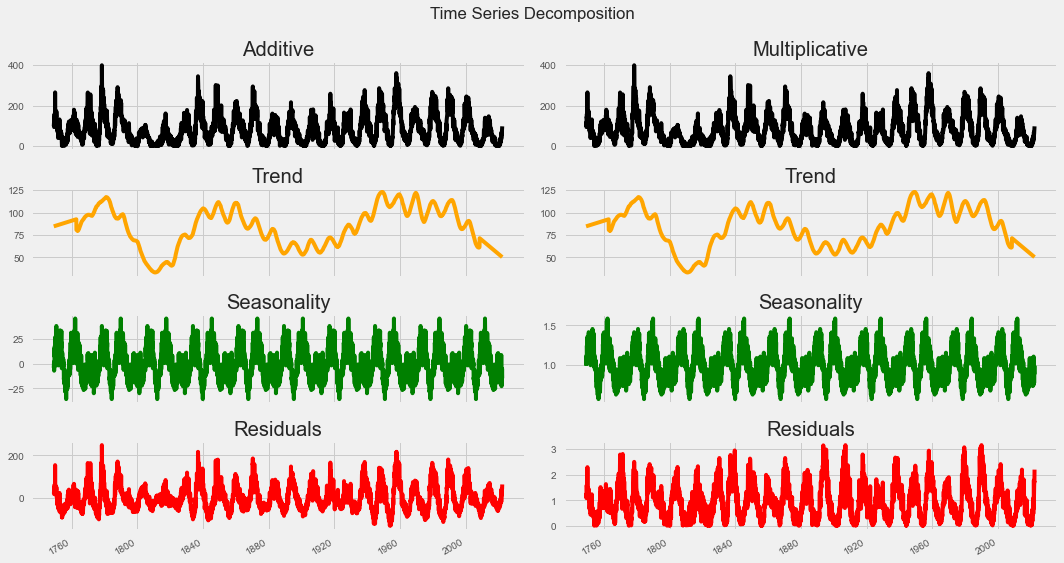

In [23]:
plt.style.use('fivethirtyeight')
ts_analysis(solar_cycle['ssn']+1, n_periods=333)